In [2]:
import pandas as pd 

In [3]:
data = pd.read_csv("Titanic-Dataset.csv")
df = pd.DataFrame(data)

In [4]:
df.info()
df.Age.value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Age
24.00    30
22.00    27
18.00    26
19.00    25
28.00    25
         ..
36.50     1
55.50     1
0.92      1
23.50     1
74.00     1
Name: count, Length: 88, dtype: int64

# Fixing Age. 

We can notice on the info of our DF that age has some incomplet data and checking futher in that column we can see that it has some strange numbers like 0.92 or 36.50. 

Solutions? 

1. We cant delete the whole column, it has relevant information that will be usefull to get a resolution of the problem, instead we need to fill it. We are going to take the whole column and get the medium of it so that the percentage of ages is not affected by extreme values (95 for example).



2. For the strange values we cannot simply delete or change the values, because it may transform into something that we may actually dont need (like float to int, this would change the whole values) so we need to create a whole group to categorize correctly the age range. 

In [5]:
Age_median = df["Age"].median() # Filling the column with the median
df["Age"].fillna(Age_median, inplace = True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
Age_bins = [0, 2, 12, 18, 60, 80]

# pd.cut() to take the range (Age_bins) to categorize by ages and put a label in it
df["Age_group"] = pd.cut(df["Age"], bins = Age_bins, labels = ["Baby", "Kid", "Teenager" ,"Adult","Elder"], include_lowest=True )

print(df["Age_group"].value_counts())

df

Age_group
Adult       730
Teenager     70
Kid          45
Baby         24
Elder        22
Name: count, dtype: int64


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_group
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Adult
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Adult
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Adult
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Adult
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Adult
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,Adult
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,Adult
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,NaN,S,Adult
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,Adult


# Age Solved ✅

Now the column Age is filled and it has an age group

## Other problems. 

What else can we clean on this dataset? 

The Cabin column has a lot of null data, do we really want to know the cabin where the passenger was in? We could fill all the null data on there, but there is a lot to fill and we dont really need to get any information from it so lets just delete it. 

In [16]:
new_df = df.drop("Cabin", axis = 1) # Getting rid of Cabin

new_df.info()
new_df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    int64   
 1   Survived     891 non-null    int64   
 2   Pclass       891 non-null    int64   
 3   Name         891 non-null    object  
 4   Sex          891 non-null    object  
 5   Age          891 non-null    float64 
 6   SibSp        891 non-null    int64   
 7   Parch        891 non-null    int64   
 8   Ticket       891 non-null    object  
 9   Fare         891 non-null    float64 
 10  Embarked     889 non-null    object  
 11  Age_group    891 non-null    category
dtypes: category(1), float64(2), int64(5), object(4)
memory usage: 77.8+ KB


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Age_group
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,Adult
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,Adult
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,Adult
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,Adult
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,Adult
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S,Adult
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S,Adult
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,S,Adult
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C,Adult


We have taken down the Cabin column. 

Its seems like everything is clean now. Lets just get some things a lot easier to read, like the sibSp column and de Parch column. 

In [17]:
new_df["Family size"] = new_df["SibSp"] + new_df["Parch"] # Sum to get the total family members
new_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Age_group,Family size
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,Adult,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,Adult,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,Adult,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,Adult,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,Adult,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S,Adult,0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S,Adult,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,S,Adult,3
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C,Adult,0


We are now ready to do the analysis.

# Analysing the dataset.

In order to find the "history" behind the data we need to first do some questions like: 

**Wich factors decided the survival of the passengers? The younger ones were the main survivors? Or the ones with higher class?** 
Lets find out.

### Class vs Survival

were the higher class more susceptible to survive?

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

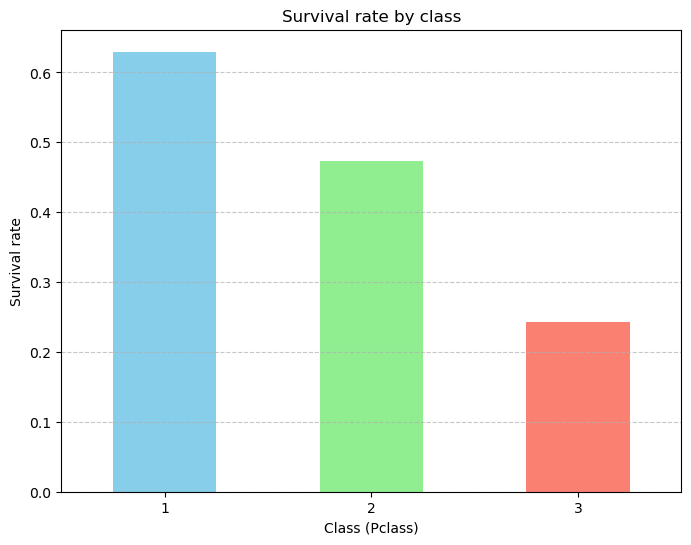

In [31]:
import matplotlib.pyplot as plt

# Getting the mean of the survivors by their class
survival_rate_by_Pclass = new_df.groupby("Pclass")["Survived"].mean()

#Plotting the data

plt.figure(figsize = (8,6))
survival_rate_by_Pclass.plot(kind = "bar", color = ["skyblue", "lightgreen","salmon"])
plt.title("Survival rate by class")
plt.xlabel("Class (Pclass)")
plt.ylabel("Survival rate")
plt.xticks(rotation = 0)
plt.grid(axis='y', linestyle='--', alpha=0.7)

survival_rate_by_Pclass

As we can see, the first class was the one with the bigger chance of survival and the class three had the lowest one. 

But, it was the class with the most people on? We could assume that, if the class 1 had the most passengers on it then its obvious that it will be the class with the higher survival rate, so lets check this out.

In [30]:
print("Passengers per class")
print(df['Pclass'].value_counts())

print("\nSurvivors per class")
print(df.groupby('Pclass')['Survived'].sum())

Passengers per class
Pclass
3    491
1    216
2    184
Name: count, dtype: int64

Survivors per class
Pclass
1    136
2     87
3    119
Name: Survived, dtype: int64


Oh! As we can see the first class was, in fact, not the class with the most passengers on, so actually the first class was actually the safer option! If a random passenger makes us the question "Wich class is the safer one if an accident occur during the trip?" we can surley say that the first class is the safer one. 

### Sex vs Survival

Were the men more likely to survive than the women? Lets find this out

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

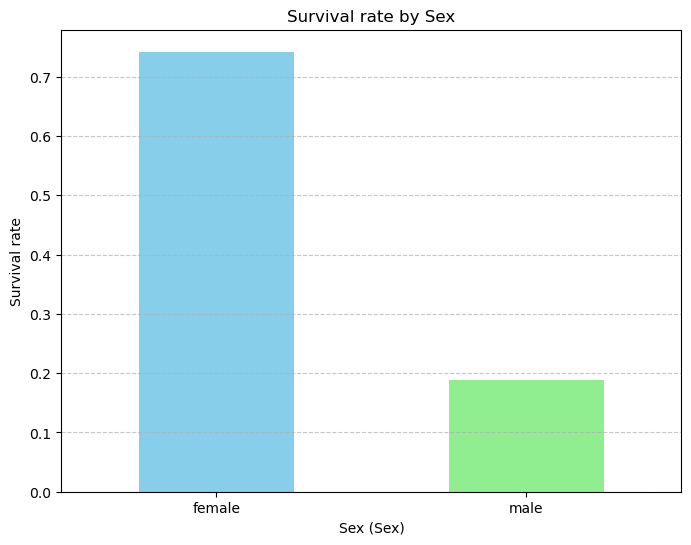

In [32]:
survival_rate_by_Sex = new_df.groupby("Sex")["Survived"].mean()

plt.figure(figsize = (8,6))
survival_rate_by_Sex.plot(kind = "bar", color = ["skyblue", "lightgreen","salmon"])
plt.title("Survival rate by Sex")
plt.xlabel("Sex (Sex)")
plt.ylabel("Survival rate")
plt.xticks(rotation = 0)
plt.grid(axis='y', linestyle='--', alpha=0.7)

survival_rate_by_Sex

Wow! We can see a big difference, the females survived more than the males. Lets check again the difference on their numbers. 

In [33]:
print("Passengers per Sex")
print(df['Sex'].value_counts())

print("\nSurvivors per Sex")
print(df.groupby('Sex')['Survived'].sum())

Passengers per Sex
Sex
male      577
female    314
Name: count, dtype: int64

Survivors per Sex
Sex
female    233
male      109
Name: Survived, dtype: int64


There was more males than females but there were more female survivors than males survivors! So we can surley say that in case of accident on another titanic, if you are a female you are more likely to live.

### Age vs Survival 

Do the younger ones are more likely to live than the older ones? Lets answer that question.

C:\Users\Josuk\AppData\Local\Temp\ipykernel_10372\292670503.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  survival_rate_by_Age = new_df.groupby("Age_group")["Survived"].mean()


Age_group
Baby        0.625000
Kid         0.555556
Teenager    0.428571
Adult       0.365753
Elder       0.227273
Name: Survived, dtype: float64

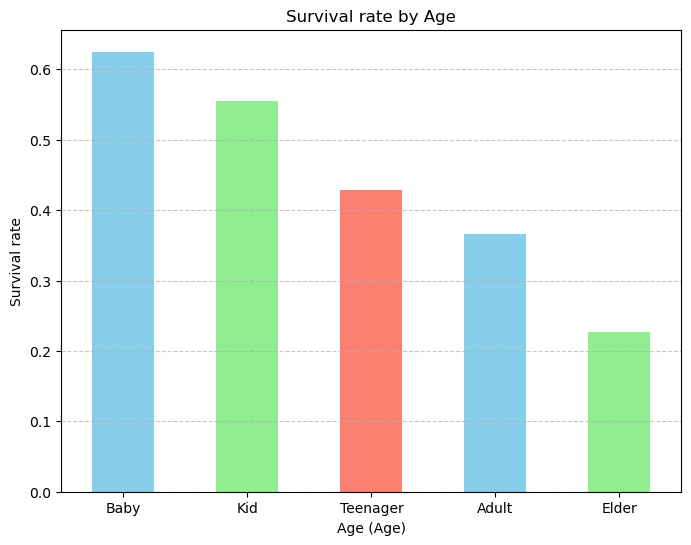

In [38]:
survival_rate_by_Age = new_df.groupby("Age_group")["Survived"].mean()

plt.figure(figsize = (8,6))
survival_rate_by_Age.plot(kind = "bar", color = ["skyblue", "lightgreen","salmon"])
plt.title("Survival rate by Age")
plt.xlabel("Age (Age)")
plt.ylabel("Survival rate")
plt.xticks(rotation = 0)
plt.grid(axis='y', linestyle='--', alpha=0.7)

survival_rate_by_Age

We can see that, the babies were the ones that had the better survival rate. Lets again check the numbers.

In [39]:
print("Passengers per Age")
print(df['Age_group'].value_counts())

print("\nSurvivors per Age")
print(df.groupby('Age_group')['Survived'].sum())

Passengers per Age
Age_group
Adult       730
Teenager     70
Kid          45
Baby         24
Elder        22
Name: count, dtype: int64

Survivors per Age
Age_group
Baby         15
Kid          25
Teenager     30
Adult       267
Elder         5
Name: Survived, dtype: int64


C:\Users\Josuk\AppData\Local\Temp\ipykernel_10372\3534007929.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(df.groupby('Age_group')['Survived'].sum())


there wasnt that much babies, but almost every baby survived! So we can say that babies are more likely to survive.

## What can we guess with all this? 🤔

We can surley say that the survival of the passengers were dependant on the class they were on, their age and their sex. The females were more likely to survive as the babies and the passengers on the first class.

But what happens with the females on the third class? They were more likey to survive? or the Elders on the first class? Lets check that out. 

### Sex & Class vs Survival

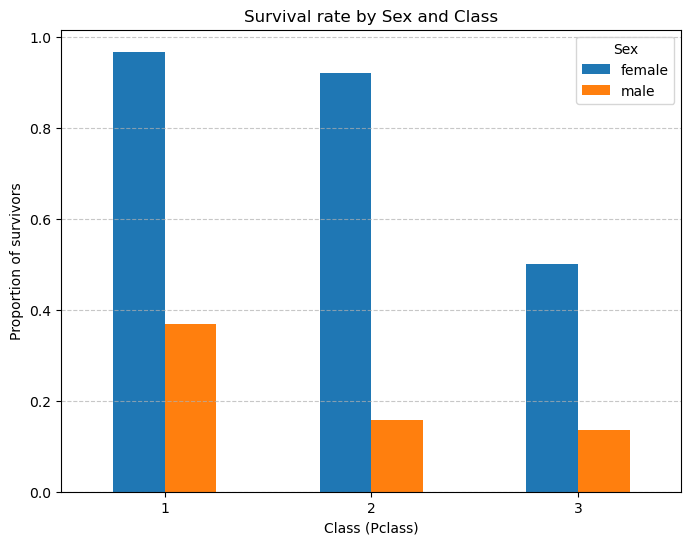

In [50]:
grouped_Pclass_Sex = new_df.groupby(['Pclass', 'Sex'])['Survived'].mean().unstack()

grouped_Pclass_Sex.plot(kind = "bar", figsize=(8,6))

plt.title('Survival rate by Sex and Class')
plt.xlabel('Class (Pclass)')
plt.ylabel('Proportion of survivors')
plt.xticks(rotation=0)
plt.legend(title='Sex')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

As we can see, on every class the females were more likely to survive than the males. One interesting thing that we can notice is that the females on the first and second class were much more likely to survive than the females on the third class.

### Age & Class vs Survival

C:\Users\Josuk\AppData\Local\Temp\ipykernel_10372\1263286072.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_Pclass_Age = new_df.groupby(['Pclass', 'Age_group'])['Survived'].mean().unstack()


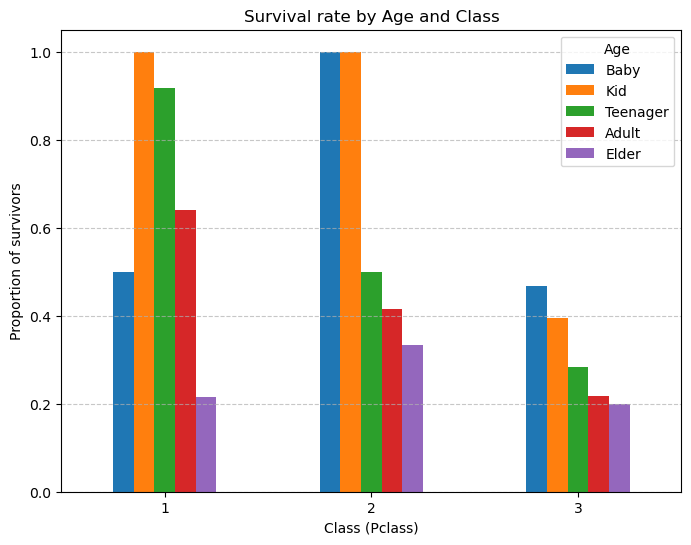

In [51]:
grouped_Pclass_Age = new_df.groupby(['Pclass', 'Age_group'])['Survived'].mean().unstack()

grouped_Pclass_Age.plot(kind = "bar", figsize=(8,6))

plt.title('Survival rate by Age and Class')
plt.xlabel('Class (Pclass)')
plt.ylabel('Proportion of survivors')
plt.xticks(rotation=0)
plt.legend(title='Age')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

We can see some interesting things here. Although we said before that the babies were the ones who survived the most (that in fact its true) we can see that on the first class the survival rate of babies is very low! being the kids and teenagers the ones who survived the most.

We can also see on the second class that the babies and the kids were the ones who survived the most in an equal rate. 

# Everything we need to know. 📖

As we finish with our analysis we can get on hand on a lot of things. 

**Whats the most important fact that got higher survival rates?** 

If we check the comparision graph beewteen females and males we can clearly see an answer there. All females on the Titanic were more likely to survive than any other passenger so your sex was key to know if you were more able to survive than others. We can see a big difference too on the classes being the first class the most safer option to get more higher survival rates. 

**The profile of the survivor** 

To be an "ideal" survivor you needed to be a female kid who got to travel on a first class. 

**Interesting data** 

We cant get out the fact that if you were a female on the titanic your survival chances were so much higher than any other passenger, and how being a male was in fact a key to die on the accident.